# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [22]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\Armand\AppData\Local\Temp\ipykernel_10828\1814785894.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


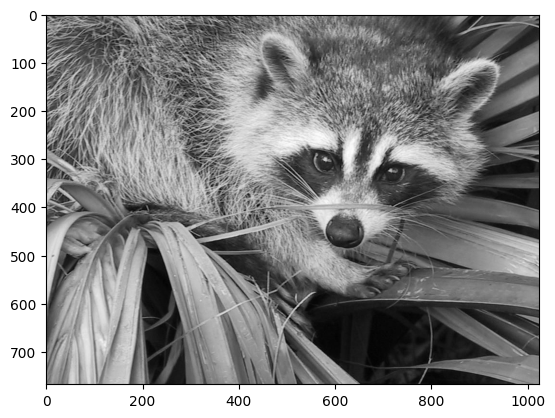

In [47]:
X = misc.face(gray=True)
XX = X
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

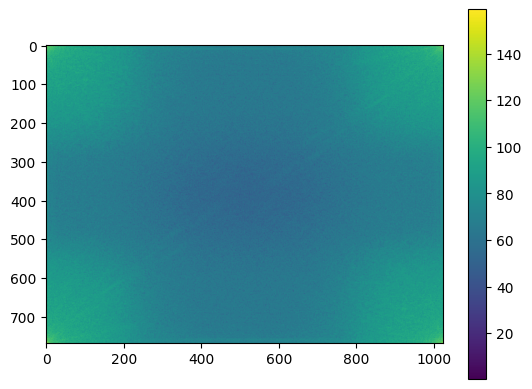

In [53]:
Y = np.fft.fft2(X)
YY = Y
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

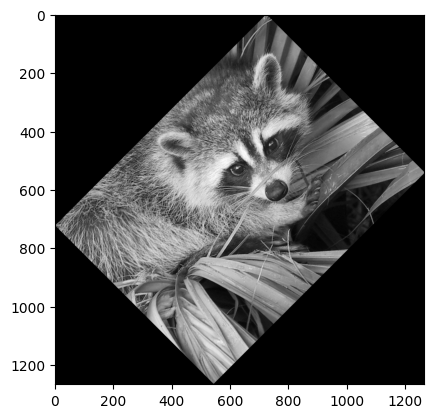

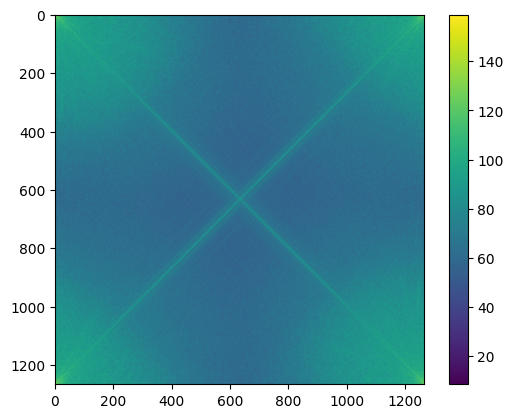

In [25]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

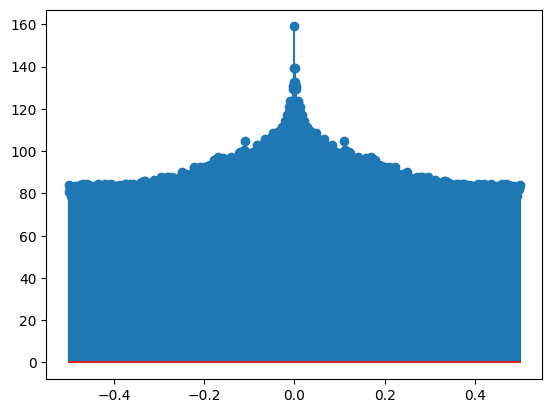

In [26]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

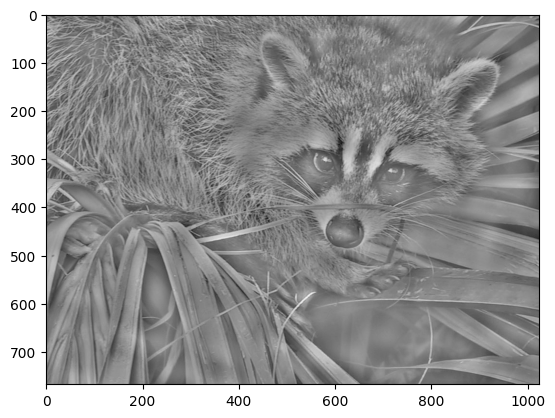

In [27]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

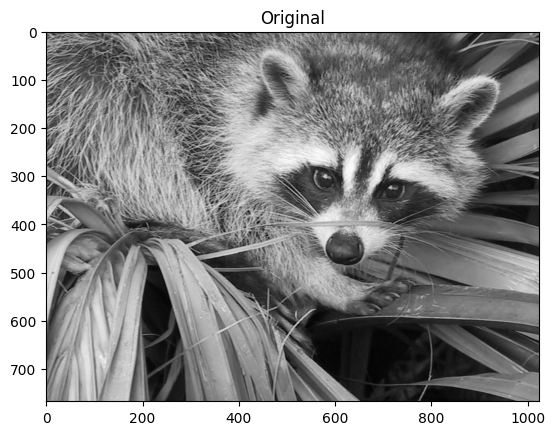

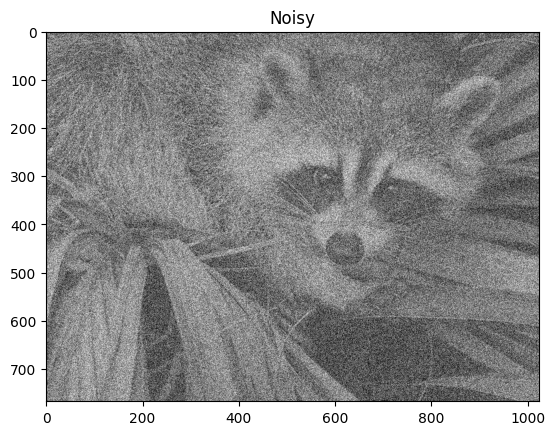

In [28]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. Acest exercitiu nu este pe notebookul pus pe site-ul dvs, ci este doar pe notebookul pus te teams si face legatura cu un exercitiu dat la laboratoare pe care nu le-am avut(din anii trecuti cred). Deci conclud ca nu trebuie facut.

In [30]:
print(X.shape[0],X.shape[1])

768 1024


In [34]:
N = 1024

def generate(N1,N2,f):
    A = np.zeros((N1,N2))
    for i in range(N1):
        for(j) in range(N2):
            A[i][j] = f(i,j)
    return A

def imagine_si_spectru(N1,N2,f):
    X = generate(N1,N2,f)
    plt.imshow(X, cmap=plt.cm.gray)
    plt.show()

    Y = np.fft.fft2(X)
    freq_db = 20*np.log10(abs(Y), where=abs(Y)>0)

    plt.imshow(freq_db)
    plt.colorbar()
    plt.show()

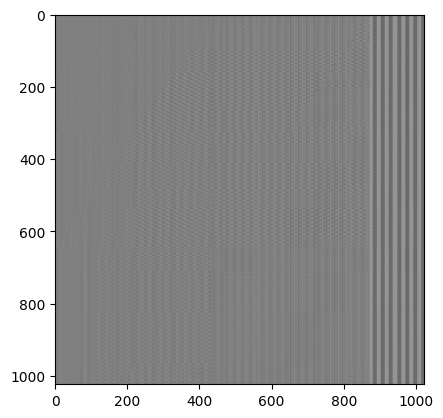

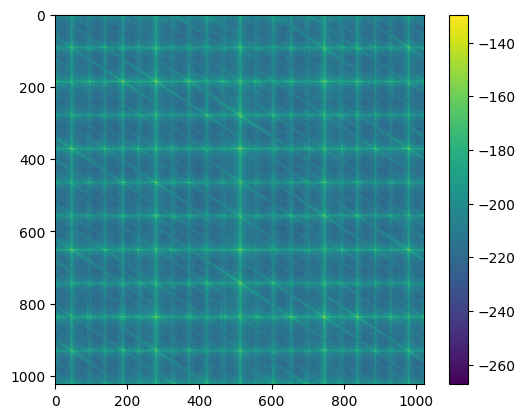

In [35]:
def f(x,y):
    return np.sin(2*np.pi*x+3*np.pi*y)

imagine_si_spectru(N,N,f)

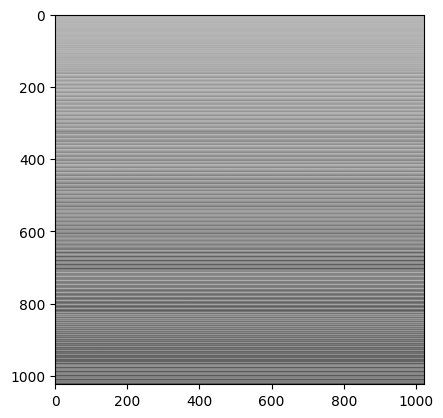

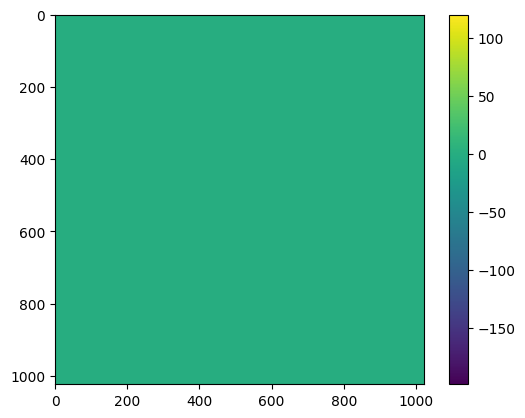

In [36]:
def f(x,y):
    return np.sin(4*np.pi*x)+np.cos(6*np.pi*y)

imagine_si_spectru(N,N,f)

In [43]:
def generateY(N1,N2,x1,y1,x2,y2):
    A = np.zeros((N1,N2))
    A[x1][y1]=1
    A[x2][y2]=1
    return A

def spectru_si_imagine(Y):
    freq_db = 20*np.log10(abs(Y), where=abs(Y)>0)

    plt.imshow(freq_db)
    plt.colorbar()
    plt.show()
    
    X = np.real(np.fft.ifft2(Y))
    plt.imshow(X, cmap=plt.cm.gray)
    plt.show()

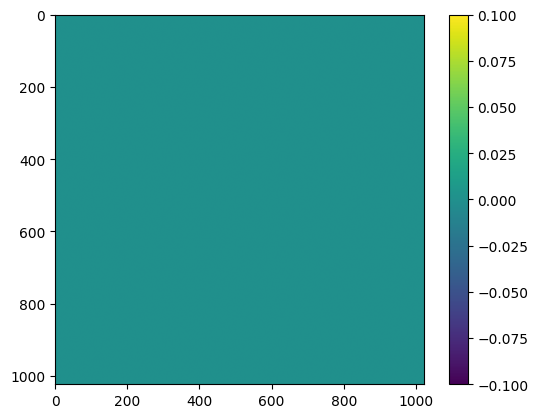

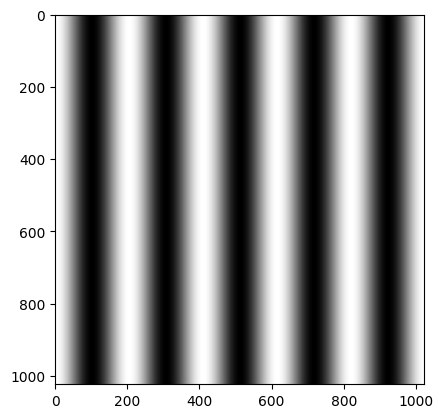

In [44]:
Y = generateY(N,N,0,5,0,N-5)
spectru_si_imagine(Y)

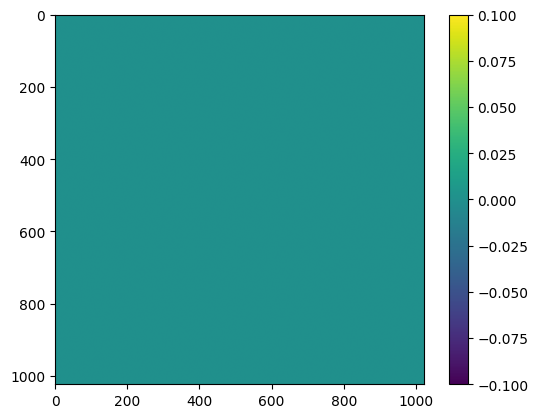

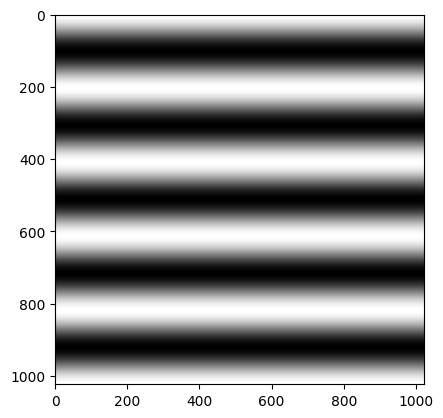

In [45]:
Y = generateY(N,N,5,0,N-5,0)
spectru_si_imagine(Y)

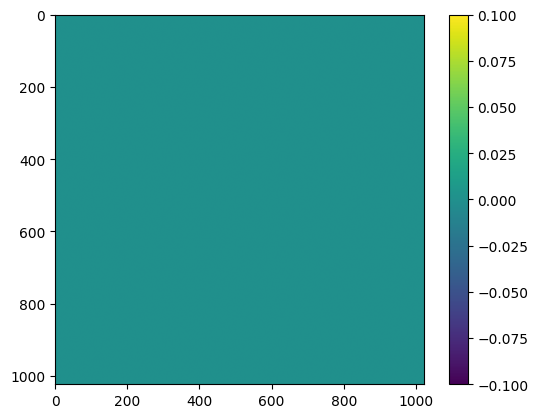

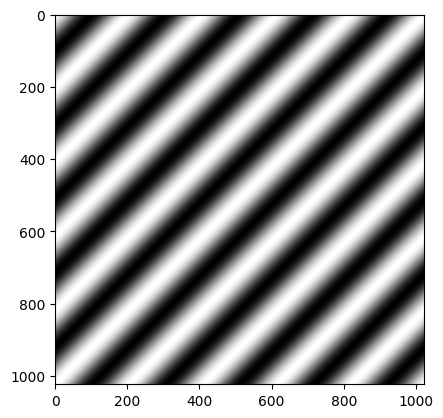

In [46]:
Y = generateY(N,N,5,5,N-5,N-5)
spectru_si_imagine(Y)

In [90]:
# Cum se calculeaza SNR-ul unei imagini nu apare prin materiale si , bazat pe ce am gasit pe internet, exista mai multe variante de a-l calcula
# O sa merg cu varianta de pe wikipedia, pt ca pare mai intuitiva: media/deviatia standard

X = XX
Y = YY
def calc_SNR(X):
    #print(np.mean(X),np.std(X))
    return np.mean(X)/np.std(X)#+1e-10

def scoate_fv_inalte(Y,freq_cutoff):
    Y_cutoff = Y.copy()
    Y_cutoff[freq_db > freq_cutoff] = 0
    X_cutoff = np.fft.ifft2(Y_cutoff)
    X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                    # in practice use irfft2
    #plt.imshow(X_cutoff, cmap=plt.cm.gray)
    #plt.show()
    return X_cutoff

In [88]:
#NU
print(X)
print(np.mean(X))
print(scoate_fv_inalte(Y,159))
print(freq_db)

Y_cutoff = Y.copy()
print(Y)
Y_cutoff[freq_db > 159] = 0
print(Y_cutoff)
X_cutoff = np.fft.ifft2(Y_cutoff)
print(X_cutoff)
X_cutoff = np.real(X_cutoff)
print(X_cutoff)

[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]
113.48026784261067
[[  0.51973216  16.51973216  31.51973216 ...   5.51973216  15.51973216
   23.51973216]
 [-30.48026784  -9.48026784   9.51973216 ...   4.51973216  20.51973216
   32.51973216]
 [-45.48026784 -25.48026784  -4.48026784 ...   5.51973216  20.51973216
   31.51973216]
 ...
 [-15.48026784 -10.48026784   2.51973216 ...  30.51973216  29.51973216
   29.51973216]
 [-19.48026784  -9.48026784   6.51973216 ...  29.51973216  28.51973216
   28.51973216]
 [-19.48026784  -7.48026784   5.51973216 ...  28.51973216  27.51973216
   26.51973216]]
[[159.01163058 139.22191055 132.51360136 ... 130.75417347 132.51360136
  139.22191055]
 [137.18575161 134.0419244  129.57621757 ... 128.59771022 130.58414107
  135.45561179]
 [129.66837234 126.28327114 121.88129024 ... 133.01971983 120.6119392
  133.20213788]
 

In [91]:
#SNR_limit = 3
freq_cutoff = 160

while freq_cutoff >= 130: # and calc_SNR(scoate_fv_inalte(Y,freq_cutoff)) <= SNR_limit:
    print(calc_SNR(scoate_fv_inalte(Y,freq_cutoff)))
    freq_cutoff -= 1
calc_SNR(scoate_fv_inalte(Y,freq_cutoff))
print("Frecventa",freq_cutoff)

2.0737716391704217
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
-1.7414330683164083e-16
2.658926728588135e-18
2.658926728588135e-18
-3.660712554774502e-18
-3.660712554774502e-18
-7.302537107073548e-18
-1.0666387607511719e-17
-3.3328835623780407e-18
1.6126081902802414e-18
1.6681463691955712e-18
8.590922012002347e-18
Frecventa 129


In [102]:
# 3
print(calc_SNR(X_noisy))
Y_noisy = np.fft.fft2(X_noisy)
freq_db = 20*np.log10(abs(Y_noisy))
Y_cutoff = Y_noisy.copy()
Y_cutoff[freq_db > 150] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
#plt.imshow(X_cutoff, cmap=plt.cm.gray)
#plt.show()
print(calc_SNR(X_cutoff))

0.8872482545405179
5.030578202163188e-17
